In [ ]:
#Import all relevant libraries.
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.backend import clear_session

import matplotlib.pyplot as plt

In [ ]:
#File variable holds the path to the dataset used
#current dataset holds altitude, latitude, local time, and density.
file = "Dataset-Full.csv"
X = np.loadtxt(file, delimiter=",", skiprows=1, usecols=(0, 1, 2))
#density is used as the network's output
Y = np.loadtxt(file, delimiter=",", skiprows=1, usecols=(5))
#Density gets multiplied by 0.25 for graphing and the network trains better
#with a small range of values thus, it is better to multiply by 0.25 from the beginning.
Y = np.multiply(Y, 0.25)

In [ ]:
#Use this cell instead if loading in a pre-trained mode - skip the next 2 cells
model = load_model("Heat_Map_Model.h5")

In [ ]:
#Clears previous session (network) from memory.
clear_session()

#Define Network structre and Hyperparameters.
model = Sequential()
model.add(Dense(80, input_shape=[3], activation='selu'))
model.add(Dense(80, activation='selu'))
model.add(Dense(80, activation='selu'))
model.add(Dense(80, activation='selu'))
model.add(Dense(1))

model.compile(loss='huber', optimizer="adam")
#Display model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_3 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 81        
Total params: 19,841
Trainable params: 19,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(X, Y, epochs=(800*4), verbose=0)

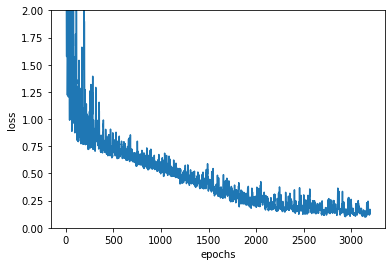

<Figure size 432x288 with 0 Axes>

In [ ]:
#Used to generate a graph to show training progress
#smaller loss is better
plt.plot(hist.history["loss"])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim([0,2])
#plt.xlim([1300, 12050])
plt.show()
plt.savefig('Loss vs Training epoch', bbox_inches= None, pad_inches = 0)

In [ ]:
class altitude_layer:
  def __init__(self, altitude, latitude, local_time, density):
    self.altitude = altitude
    self.latitude = latitude
    self.local_time = local_time
    self.density = density


def create_map(x1, x2, y1, y2):
  #By having a smaller circle size, more individual data points can fit in a graph.
  circle_size = 15
  #Create a figure with 8 plots.
  plt.subplots(4, 2, figsize=(24,24))
  layer1 = altitude_layer([], [], [], [])
  layer2 = altitude_layer([], [], [], [])
  layer3 = altitude_layer([], [], [], [])
  layer4 = altitude_layer([], [], [], [])

  #Sort data into altitude layers.
  for i in range(x1.shape[0]):
    if(x1[i][0]>950 and x1[i][0]<=1050):
      layer1.altitude = np.append(layer1.altitude, int(x1[i][0]))
      layer1.latitude = np.append(layer1.latitude, int(x1[i][1]))
      layer1.local_time = np.append(layer1.local_time, int(x1[i][2]))
      layer1.density = np.append(layer1.density, int(y1[i]))

    if(x1[i][0]>1050 and x1[i][0]<=1150):
      layer2.altitude = np.append(layer2.altitude, int(x1[i][0]))
      layer2.latitude = np.append(layer2.latitude, int(x1[i][1]))
      layer2.local_time = np.append(layer2.local_time, int(x1[i][2]))
      layer2.density = np.append(layer2.density, int(y1[i]))

    if(x1[i][0]>1150 and x1[i][0]<=1250):
      layer3.altitude = np.append(layer3.altitude, int(x1[i][0]))
      layer3.latitude = np.append(layer3.latitude, int(x1[i][1]))
      layer3.local_time = np.append(layer3.local_time, int(x1[i][2]))
      layer3.density = np.append(layer3.density, int(y1[i]))

    if(x1[i][0]>1250 and x1[i][0]<=1350):
      layer4.altitude = np.append(layer4.altitude, int(x1[i][0]))
      layer4.latitude = np.append(layer4.latitude, int(x1[i][1]))
      layer4.local_time = np.append(layer4.local_time, int(x1[i][2]))
      layer4.density = np.append(layer4.density, int(y1[i]))

  #Create the graphs for the Cassini data.
  plt.subplot(427)
  plt.scatter(layer1.local_time, layer1.latitude, linewidth=1.0, c=layer1.density, vmin=0, vmax=10, s=100, cmap='plasma')
  plt.title('Altitude range 950-1050 km', fontsize=19.0)
  plt.ylim(-90,90)
  plt.ylabel('Latitude (\xb0N)', fontsize=19.0)
  plt.xlim(-180,180)
  plt.xlabel('Titan Local Time', fontsize=19.0)
  plt.xticks([-180, -120, -60, 0, 60, 120, 180], ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize=16.0)
  plt.yticks([-90, -60, -30, 0, 30, 60, 90], ['-90', '-60', '-30', '0', '30', '60', '90'], fontsize=16.0)
  cb = plt.colorbar()
  cb.set_label(label='Normalised density ($cm^{-3} \cdot \u03B5$)', fontsize=19.0)
  cb.ax.tick_params(labelsize=16.0)
  plt.text(-210, 105, 'd)', fontsize=25, fontweight='bold', va='top', ha='right')

  plt.subplot(425)
  plt.scatter(layer2.local_time, layer2.latitude, linewidth=1.0, c=layer2.density, vmin=0, vmax=10, s=100, cmap='plasma')
  plt.title('Altitude range 1050-1150 km', fontsize=19.0)
  plt.ylim(-90,90)
  plt.ylabel('Latitude (\xb0N)', fontsize=19.0)
  plt.xlim(-180,180)
  #plt.xlabel('Titan Local Time', fontsize=19.0)
  plt.xticks([-180, -120, -60, 0, 60, 120, 180], ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize=16.0)
  plt.yticks([-90, -60, -30, 0, 30, 60, 90], ['-90', '-60', '-30', '0', '30', '60', '90'], fontsize=16.0)
  cb = plt.colorbar()
  cb.set_label(label='Normalised density ($cm^{-3} \cdot \u03B5$)', fontsize=19.0)
  cb.ax.tick_params(labelsize=16.0)
  plt.text(-210, 105, 'c)', fontsize=25, fontweight='bold', va='top', ha='right')

  plt.subplot(423)
  plt.scatter(layer3.local_time, layer3.latitude, linewidth=1.0, c=layer3.density, vmin=0, vmax=10, s=100, cmap='plasma')
  plt.title('Altitude range 1150-1250 km', fontsize=19.0)
  plt.ylim(-90,90)
  plt.ylabel('Latitude (\xb0N)', fontsize=19.0)
  plt.xlim(-180,180)
  #plt.xlabel('Titan Local Time', fontsize=19.0)
  plt.xticks([-180, -120, -60, 0, 60, 120, 180], ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize=16.0)
  plt.yticks([-90, -60, -30, 0, 30, 60, 90], ['-90', '-60', '-30', '0', '30', '60', '90'], fontsize=16.0)
  cb = plt.colorbar()
  cb.set_label(label='Normalised density ($cm^{-3} \cdot \u03B5$)', fontsize=19.0)
  cb.ax.tick_params(labelsize=16.0)
  plt.text(-210, 105, 'b)', fontsize=25, fontweight='bold', va='top', ha='right')


  plt.subplot(421)
  plt.scatter(layer4.local_time, layer4.latitude, linewidth=1.0, c=layer4.density, vmin=0, vmax=10, s=100, cmap='plasma')
  plt.title('Altitude range 1250-1350 km', fontsize=19.0)
  plt.ylim(-90,90)
  plt.ylabel('Latitude (\xb0N)', fontsize=19.0)
  plt.xlim(-180,180)
  #plt.xlabel('Titan Local Time', fontsize=19.0)
  plt.xticks([-180, -120, -60, 0, 60, 120, 180], ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize=16.0)
  plt.yticks([-90, -60, -30, 0, 30, 60, 90], ['-90', '-60', '-30', '0', '30', '60', '90'], fontsize=16.0)
  cb = plt.colorbar()
  cb.set_label(label='Normalised density ($cm^{-3} \cdot \u03B5$)', fontsize=19.0)
  cb.ax.tick_params(labelsize=16.0)
  plt.text(-210, 105, 'a)', fontsize=25, fontweight='bold', va='top', ha='right')

  layer1 = altitude_layer([], [], [], [])
  layer2 = altitude_layer([], [], [], [])
  layer3 = altitude_layer([], [], [], [])
  layer4 = altitude_layer([], [], [], [])

  #Sort values from the network's prediction.                  
  for i in range(x2.shape[0]):
    if(x2[i][0] == 1000):
      layer1.altitude = np.append(layer1.altitude, int(x2[i][0]))
      layer1.latitude = np.append(layer1.latitude, int(x2[i][1]))
      layer1.local_time = np.append(layer1.local_time, int(x2[i][2]))
      layer1.density = np.append(layer1.density, int(y2[i]))

    if(x2[i][0] == 1100):
      layer2.altitude = np.append(layer2.altitude, int(x2[i][0]))
      layer2.latitude = np.append(layer2.latitude, int(x2[i][1]))
      layer2.local_time = np.append(layer2.local_time, int(x2[i][2]))
      layer2.density = np.append(layer2.density, int(y2[i]))

    if(x2[i][0] == 1200):
      layer3.altitude = np.append(layer3.altitude, int(x2[i][0]))
      layer3.latitude = np.append(layer3.latitude, int(x2[i][1]))
      layer3.local_time = np.append(layer3.local_time, int(x2[i][2]))
      layer3.density = np.append(layer3.density, int(y2[i]))

    if(x2[i][0] == 1300):
      layer4.altitude = np.append(layer4.altitude, int(x2[i][0]))
      layer4.latitude = np.append(layer4.latitude, int(x2[i][1]))
      layer4.local_time = np.append(layer4.local_time, int(x2[i][2]))
      layer4.density = np.append(layer4.density, int(y2[i])) 

  plt.subplot(428)
  plt.scatter(layer1.local_time, layer1.latitude, linewidth=1.0, c=layer1.density, vmin=0, vmax=10, s=circle_size, cmap='plasma')
  plt.title('Altitude range 950-1050 km', fontsize=19.0)
  plt.ylim(-90,90)
  plt.ylabel('Latitude (\xb0N)', fontsize=19.0)
  plt.xlim(-180,180)
  plt.xlabel('Titan Local Time', fontsize=19.0)
  plt.xticks([-180, -120, -60, 0, 60, 120, 180], ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize=16.0)
  plt.yticks([-90, -60, -30, 0, 30, 60, 90], ['-90', '-60', '-30', '0', '30', '60', '90'], fontsize=16.0)
  cb = plt.colorbar()
  cb.set_label(label='Normalised density ($cm^{-3} \cdot \u03B5$)', fontsize=19.0)
  cb.ax.tick_params(labelsize=16.0)
  plt.text(-210, 105, 'd)', fontsize=25, fontweight='bold', va='top', ha='right')


  plt.subplot(426)
  plt.scatter(layer2.local_time, layer2.latitude, linewidth=1.0, c=layer2.density, vmin=0, vmax=10, s=circle_size, cmap='plasma')
  plt.title('Altitude range 1050-1150 km', fontsize=19.0)
  plt.ylim(-90,90)
  plt.ylabel('Latitude (\xb0N)', fontsize=19.0)
  plt.xlim(-180,180)
  #plt.xlabel('Titan Local Time', fontsize=19.0)
  plt.xticks([-180, -120, -60, 0, 60, 120, 180], ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize=16.0)
  plt.yticks([-90, -60, -30, 0, 30, 60, 90], ['-90', '-60', '-30', '0', '30', '60', '90'], fontsize=16.0)
  cb = plt.colorbar()
  cb.set_label(label='Normalised density ($cm^{-3} \cdot \u03B5$)', fontsize=19.0)
  cb.ax.tick_params(labelsize=16.0)
  plt.text(-210, 105, 'c)', fontsize=25, fontweight='bold', va='top', ha='right')


  plt.subplot(424)
  plt.scatter(layer3.local_time, layer3.latitude, linewidth=1.0, c=layer3.density, vmin=0, vmax=10, s=circle_size, cmap='plasma')
  plt.title('Altitude range 1150-1250 km', fontsize=19.0)
  plt.ylim(-90,90)
  plt.ylabel('Latitude (\xb0N)', fontsize=19.0)
  plt.xlim(-180,180)
  #plt.xlabel('Titan Local Time', fontsize=19.0)
  plt.xticks([-180, -120, -60, 0, 60, 120, 180], ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize=16.0)
  plt.yticks([-90, -60, -30, 0, 30, 60, 90], ['-90', '-60', '-30', '0', '30', '60', '90'], fontsize=16.0)
  cb = plt.colorbar()
  cb.set_label(label='Normalised density ($cm^{-3} \cdot \u03B5$)', fontsize=19.0)
  cb.ax.tick_params(labelsize=16.0)
  plt.text(-210, 105, 'b)', fontsize=25, fontweight='bold', va='top', ha='right')


  plt.subplot(422)
  plt.scatter(layer4.local_time, layer4.latitude, linewidth=1.0, c=layer4.density, vmin=0, vmax=10, s=circle_size, cmap='plasma')
  plt.title('Altitude range 1250-1350 km', fontsize=19.0)
  plt.ylim(-90,90)
  plt.ylabel('Latitude (\xb0N)', fontsize=19.0)
  plt.xlim(-180,180)
  #plt.xlabel('Titan Local Time', fontsize=19.0)
  plt.xticks([-180, -120, -60, 0, 60, 120, 180], ['00:00', '04:00', '08:00', '12:00', '16:00', '20:00', '24:00'], fontsize=16.0)
  plt.yticks([-90, -60, -30, 0, 30, 60, 90], ['-90', '-60', '-30', '0', '30', '60', '90'], fontsize=16.0)
  cb = plt.colorbar()
  cb.set_label(label='Normalised density ($cm^{-3} \cdot \u03B5$)', fontsize=19.0)
  cb.ax.tick_params(labelsize=16.0)
  plt.text(-210, 105, 'a)', fontsize=25, fontweight='bold', va='top', ha='right')

  plt.subplots_adjust(wspace=0.1, hspace=0.2)
  plt.savefig('expected vs predicted output', bbox_inches= None, pad_inches = 0)

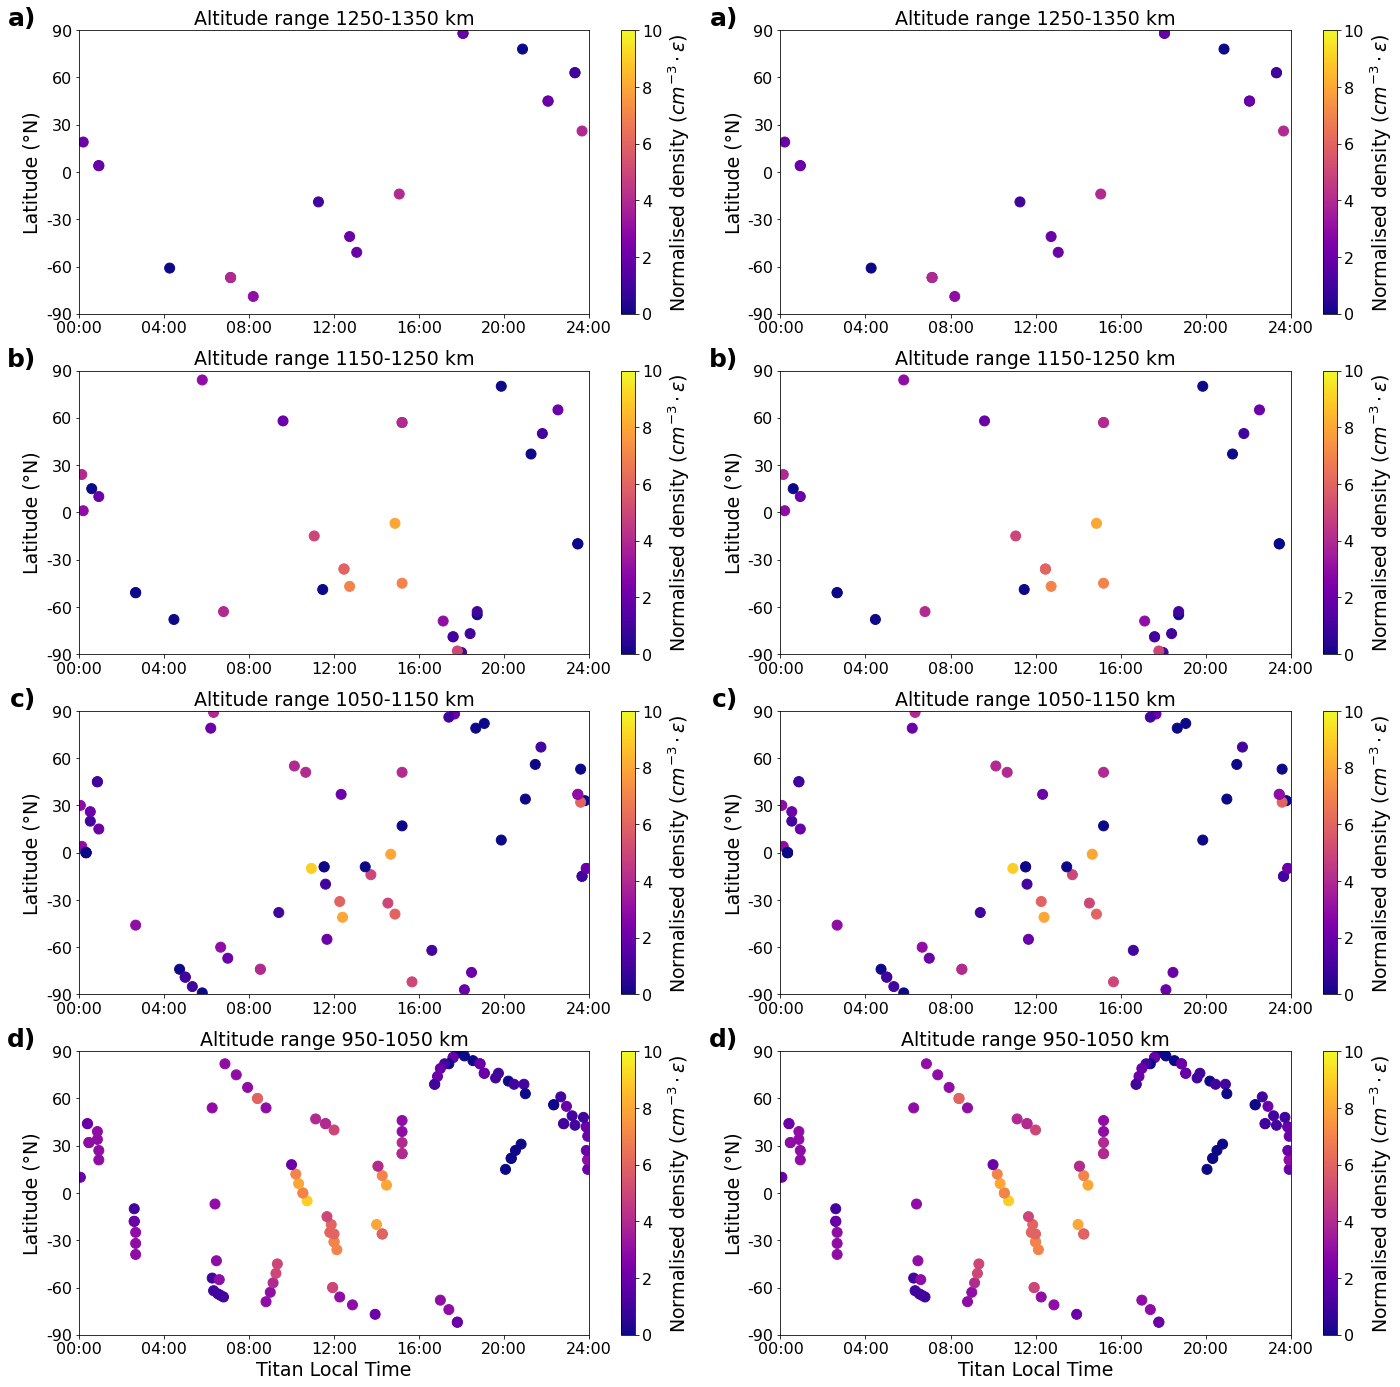

In [ ]:
create_map(X, X, Y, model.predict(X))

In [ ]:
new_data = np.array([[]])
for alt in range(1000, 1300+1, 100):
  altitude = np.array([[alt]])
  print(altitude)
  for lat in range(-90, 90+1, 2):
    latitude = np.array([[lat]])
    for t in range(-180, 180+1, 2):
      time = np.array([[t]])
      data = np.hstack((altitude, latitude, time))
      try:
        new_data = np.vstack((new_data, data))
      except:
        new_data = data

print(new_data.shape)

[[1000]]
[[1100]]
[[1200]]
[[1300]]
(65884, 3)


In [ ]:
np.savetxt("Prediction of Cassini data 900-1400Km.csv", new_data, delimiter=",")

In [ ]:
file = "Prediction of Cassini data 900-1400Km.csv"
new_data = np.loadtxt(file, delimiter=",", usecols=(0, 1, 2))

In [ ]:
new_data.shape

(3332391, 3)

In [ ]:
prediction = model.predict(new_data)
output_data = np.hstack((new_data, prediction))
output_data.shape
np.savetxt("Full Prediction of Cassini data 900-1400Km.csv", output_data, delimiter=",")

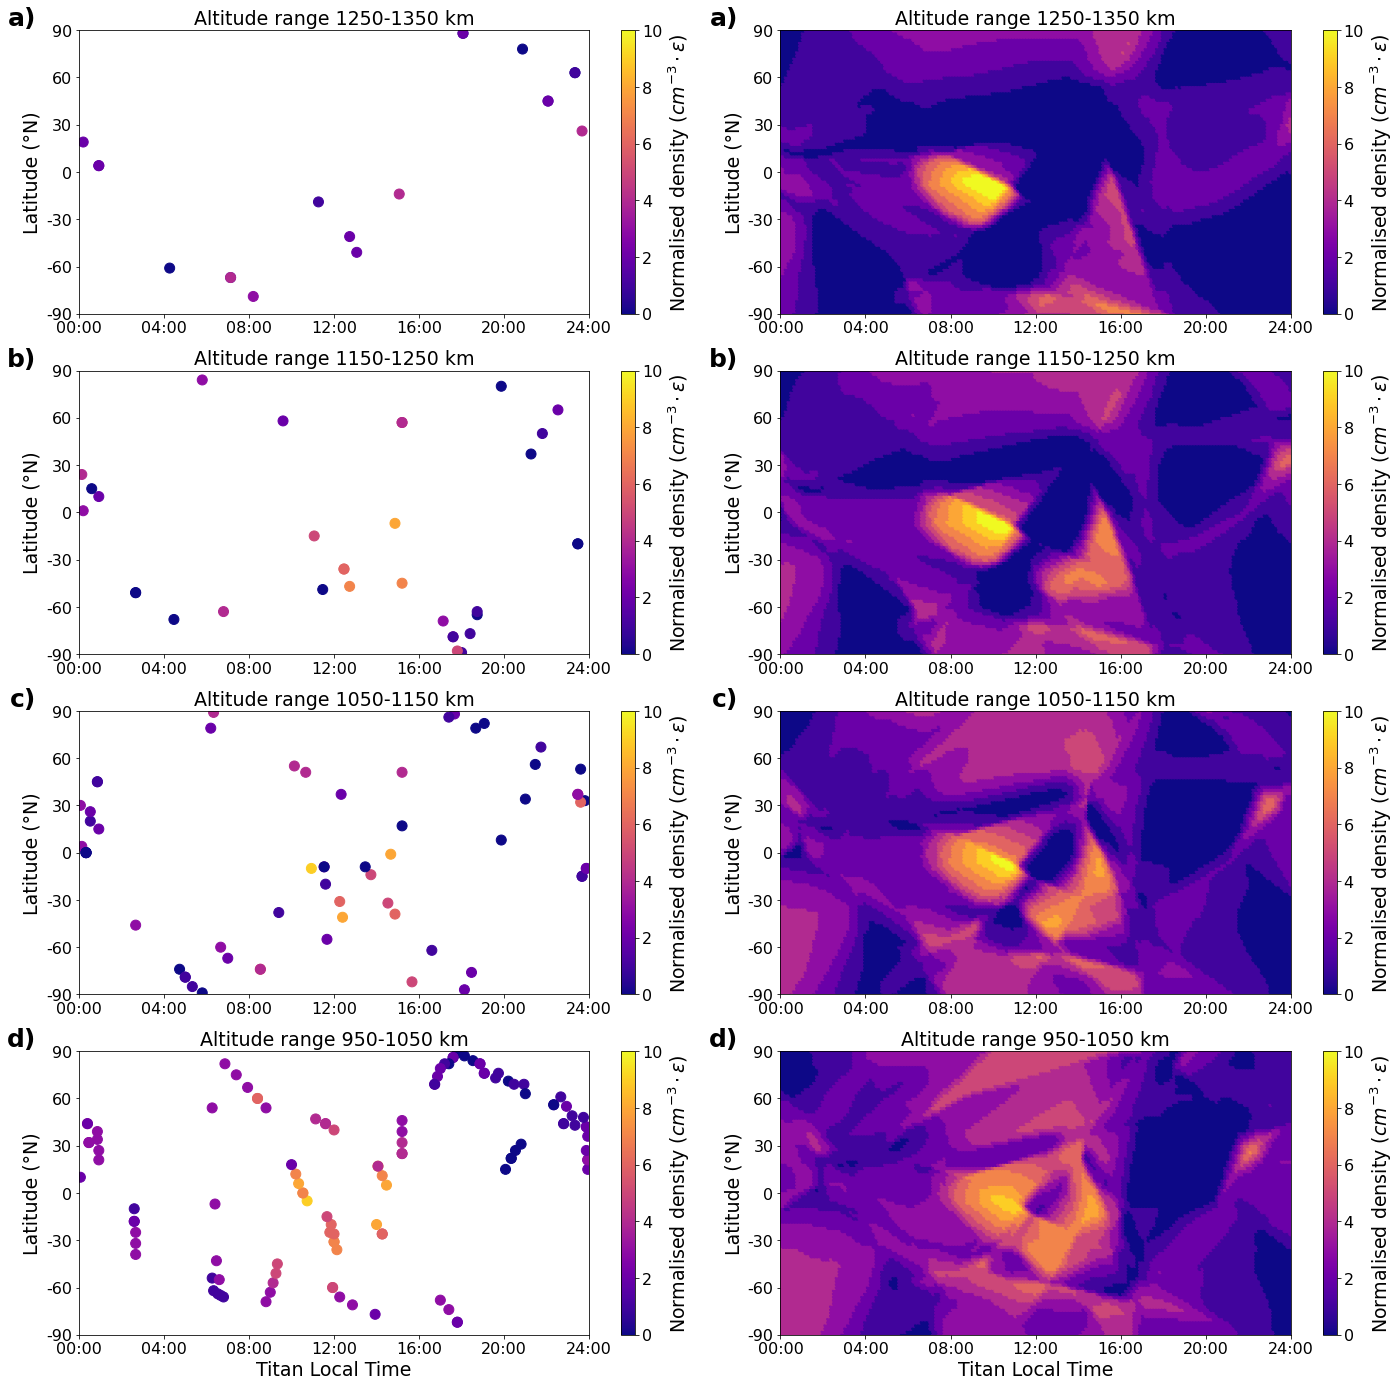

In [ ]:
output = model.predict(new_data)
create_map(X, new_data, Y, output)

In [ ]:
model.save("Heat_Map_Model.h5")